# Introduction

Hey everyone! My name is Vignesh Venkatesh. This is my first time trying to carry out an exploratory data analysis all alone without following a tutorial. Hope this notebook makes sense and if I need to correct something, please feel free to tell me as I am beginner and would like to correct myself.

Thank you!

## Importing Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

In [2]:
df_raw = pd.read_csv("Spotify/songs_normalize.csv")
df_raw

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [4]:
df_raw.isna().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

This is good as we do not have any NULL values

In [5]:
df_raw.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667437,0.720366,5.378000,-5.512435,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


## Data Cleaning

Let's check the years of release in the dataset

In [6]:
df_raw.year.unique()

array([2000, 1999, 2001, 2011, 2002, 2016, 1998, 2018, 2004, 2010, 2015,
       2006, 2008, 2019, 2003, 2013, 2005, 2012, 2020, 2007, 2009, 2017,
       2014], dtype=int64)

Since the dataset is only supposed to contain songs from the years 2000-2019, let's remove the one's we don't need, and add it to a new dataframe

In [7]:
year_mask = (df_raw['year']>=2000) & (df_raw['year']<=2019)
df = df_raw[year_mask]

In [8]:
df.year.unique()

array([2000, 2001, 2011, 2002, 2016, 2018, 2004, 2010, 2015, 2006, 2008,
       2019, 2003, 2013, 2005, 2012, 2007, 2009, 2017, 2014], dtype=int64)

As we can see, we have successfully removed the unwanted rows and added it to a new dataframe

Let's convert the ms format to minute:second format and add it to our dataframe

In [9]:
def convert(ms):
    seconds = ms/1000
    minutes = int(seconds//60)
    seconds = int(seconds%60)
    if seconds>9:
        return f"{minutes}:{seconds}"
    else:
        return f"{minutes}:0{seconds}"

df["duration_in_mm:ss"] = df['duration_ms'].apply(convert)

C:\Users\vigne\AppData\Local\Temp\ipykernel_24660\3851871526.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["duration_in_mm:ss"] = df['duration_ms'].apply(convert)


In [10]:
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_in_mm:ss
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,3:31
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",3:44
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,3:20
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.000000,0.0454,0.760,104.504,hip hop,4:44
7,Robbie Williams,Rock DJ,258560,False,2000,68,0.708,0.772,7,-4.264,1,0.0322,0.0267,0.000000,0.4670,0.861,103.035,"pop, rock",4:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop,3:01
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop,2:58
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country",3:20
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop,2:51


We have added a new column that has the time in the "MM:SS" format

## Questions

### Q1. Number of top hits per year

In [11]:
hit_tracks = df.year.value_counts()
hit_tracks = hit_tracks.sort_index()
hit_tracks = pd.DataFrame(hit_tracks)
hit_tracks.rename(columns={"year":"count"}, inplace=True)
hit_tracks

,count
2000,74
2001,108
2002,90
2003,97
2004,96
2005,104
2006,95
2007,94
2008,97
2009,84


Lets plot a bar graph to visualize this a bit better

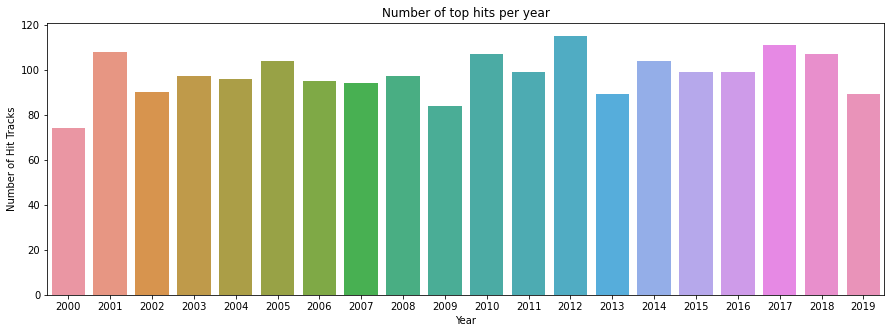

In [12]:
plt.figure(figsize=(15,5))
sns.barplot(data=hit_tracks, x=hit_tracks.index, y="count")
plt.xlabel("Year")
plt.ylabel("Number of Hit Tracks")
plt.title("Number of top hits per year");

From this graph we can conclude that the year of **2012 had the most number of hits** and the year of **2000 had the least number of hits**

### Q2. Top 10 popular artists

In [13]:
popular_artists = df.groupby('artist')[['artist','popularity']].sum().sort_values('popularity',ascending=False)
popular_artists = popular_artists[:10]
popular_artists

,popularity
artist,
Rihanna,1803
Eminem,1519
Drake,1424
Calvin Harris,1356
David Guetta,1185
Britney Spears,1140
Taylor Swift,1125
Chris Brown,1080
Kanye West,1049


Text(0, 0.5, 'Popularity')

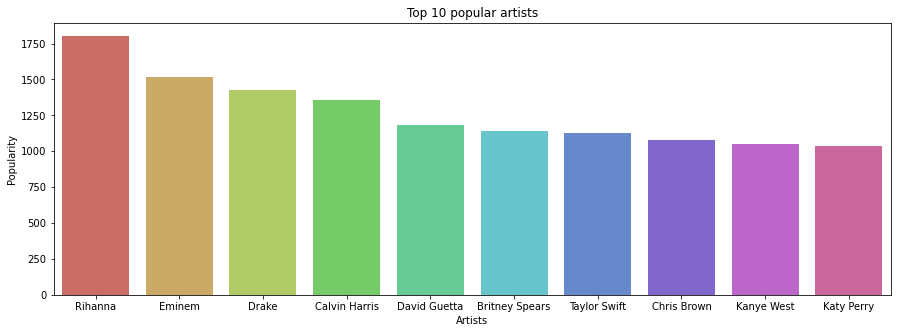

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(data=popular_artists, x=popular_artists.index, y='popularity', palette='hls')
plt.title("Top 10 popular artists")
plt.xlabel("Artists")
plt.ylabel("Popularity")

### Q3. How has the energy varied over the years

In [15]:
df_energy = df[["year","energy"]]
df_energy.set_index("year", inplace=True)
df_energy

,energy
year,
2000,0.834
2000,0.913
2000,0.928
2000,0.661
2000,0.772
...,...
2019,0.734
2019,0.702
2019,0.678


In [16]:
df_year_energy_mean = df_energy.groupby('year').mean()
df_year_energy_mean

,energy
year,
2000,0.748257
2001,0.724631
2002,0.722567
2003,0.701485
2004,0.734698
2005,0.701048
2006,0.705347
2007,0.767149
2008,0.752320


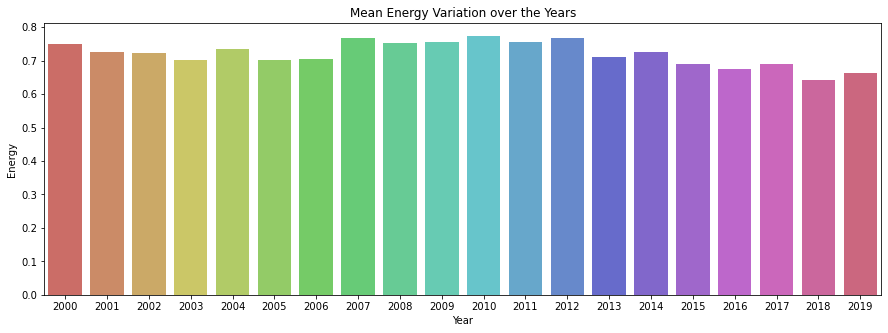

In [17]:
plt.figure(figsize=(15,5))
plt.title("Mean Energy Variation over the Years")
sns.barplot(data=df_year_energy_mean, x=df_year_energy_mean.index, y="energy", palette="hls")
plt.xlabel("Year")
plt.ylabel("Energy");

Therefore, it seems that over the years, the energy in songs has pretty much stayed constant

### Q4. Do songs in the dataset have more speech or music in them?

In [18]:
df_speechiness = df[['speechiness']]
df_speechiness

,speechiness
0,0.0437
3,0.0466
4,0.0516
6,0.0572
7,0.0322
...,...
1995,0.0588
1996,0.1570
1997,0.1090
1998,0.0656


According to the schema of the dataset,
- A speechiness value less than **0.33** depicts that the song predominantly represent music
- A speechiness value more than **0.66** depicts tracks that are probably made entirely of spoken words
- A speechiness value between **0.33 and 0.66** describe tracks that may contain both music and speech

In [19]:
def mask(speechiness):
    if speechiness<0.33:
        return 'music'
    elif speechiness>0.66:
        return 'speech'
    else:
        return 'music and speech'

df_speechiness['speechiness_verdict'] = df_speechiness['speechiness'].apply(mask)
df_speechiness

C:\Users\vigne\AppData\Local\Temp\ipykernel_24660\589275213.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speechiness['speechiness_verdict'] = df_speechiness['speechiness'].apply(mask)


,speechiness,speechiness_verdict
0,0.0437,music
3,0.0466,music
4,0.0516,music
6,0.0572,music
7,0.0322,music
...,...,...
1995,0.0588,music
1996,0.1570,music
1997,0.1090,music
1998,0.0656,music


In [20]:
speechiness = df_speechiness.groupby("speechiness_verdict").count()
speechiness.rename(columns={"speechiness":"number"}, inplace=True)
speechiness

,number
speechiness_verdict,
music,1866
music and speech,92


In [21]:
count = speechiness.number.sum()
speechiness['percentage'] = (speechiness['number']/count)*100
speechiness

,number,percentage
speechiness_verdict,,
music,1866,95.301328
music and speech,92,4.698672


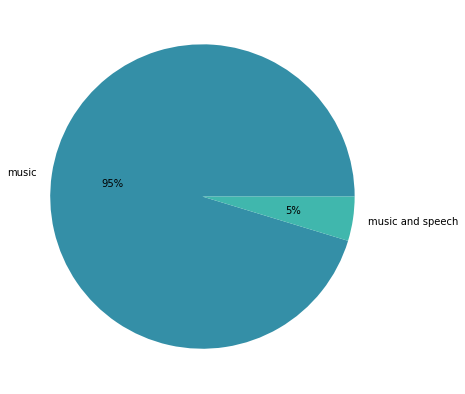

In [22]:
plt.figure(figsize=(20,7))
plt.pie(speechiness.percentage, labels=speechiness.index, colors=sns.color_palette('mako')[3:5], autopct='%.0f%%');

Therefore, we can infer that **95%** of the tracks contain both music and speech in them. We can also infer the fact that audiobooks and poetry which generally have a speechiness value close to 1.0 did not make it into the hit tracks dataset

## Correlation

<AxesSubplot:>

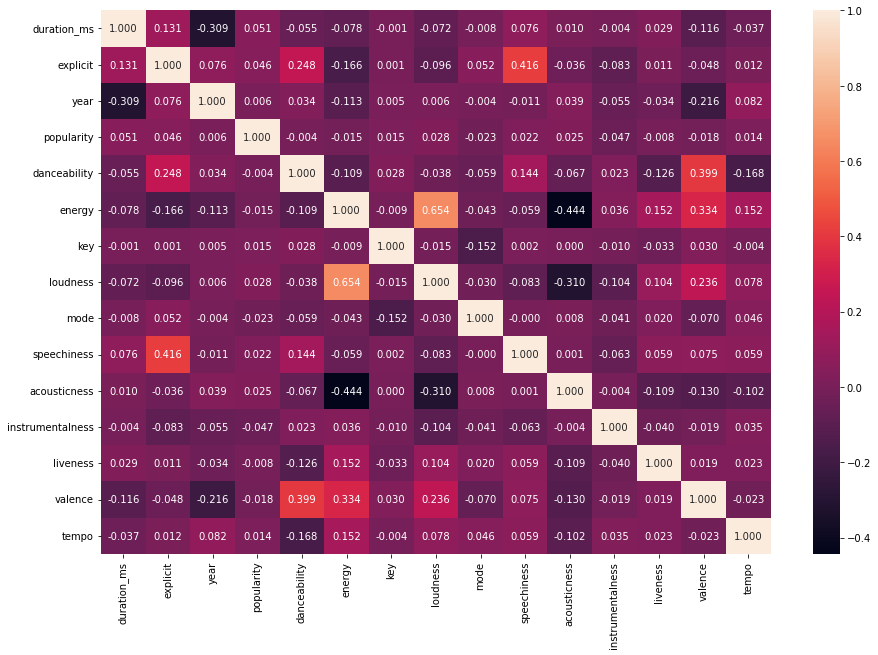

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.3f')

From this heatmap we get to know that there is a high positive correlation between loudness and energy, which is true since the more louder the track is, the more energetic it is. On the contrary, a high negative correlation between acousticness and energy is depicted, which is also true, since acoustic tracks generally are calm and composed ultimately leading to a less energetic vibe.

## Conclusions

- Year **2012** had the most number of hits, wherears Year **2000** had the least number of hits.
- Rihanna, Eminem and Drake were the top 3 artists for nearly 2 decades
- Energy in songs has pretty much stayed consistent, however if we have to look at the min and max, the year with the least energetic tracks were produced in the year of **2018** and the most energetic tracks were produced in the year **2010**
- A high percentage (**95%**) of tracks over the years have **contained both music and speech**, leaving the rest to tracks with **only music**. Also important to note that tracks with a lot more words such as audiobooks and poems, have not made it into the hit list.
- Since energy and loudness have a significant correlation of **0.654**, therefore the conclusion for energy can be applied for loudness as well and since acousticness has a negative correlation with energy (about **-0.444**), therefore the opposite can be concluded for acousticness.